In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.utils import np_utils
from tensorflow.keras import layers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten ,Dropout
import tensorflow as tf
from keras.regularizers import l2
from keras import regularizers, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import glorot_normal, RandomNormal, Zeros
from sklearn.metrics import roc_auc_score, roc_curve, auc ,accuracy_score,precision_score,recall_score,f1_score,accuracy_score
from keras.models import Model, model_from_json

In [2]:
image_size = 28
num_channels = 1
num_features = image_size * image_size * num_channels
num_classes = 10

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Train data shape: {}'.format(x_train.shape))
print('Test  data shape: {}'.format(x_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
Train data shape: (60000, 28, 28)
Test  data shape: (10000, 28, 28)


In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test  = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
npad = ((0,0), (2,2), (2,2), (0,0))
x_train = np.pad(x_train, pad_width=npad, mode='constant', constant_values=0)
x_test = np.pad(x_test, pad_width=npad, mode='constant', constant_values=0)

print(x_train.shape)
print(x_test.shape)

(60000, 32, 32, 1)
(10000, 32, 32, 1)


In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [7]:
# plotting helper function
def plothist(hist):
    
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')


    plt.show()

In [8]:
def create_cnn():
    model = Sequential()
    # Conv Block 1
    model.add(Conv2D(64, (3, 3), padding='same' , strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal() ,
                     input_shape=x_train.shape[1:]))
    model.add(BatchNormalization(momentum=0.05,trainable=True, epsilon=1e-05))# affine=True, track_running_stats=True
    model.add(Activation(activation='relu'))#(inplace)

    model.add(Conv2D(128, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)

    model.add(Conv2D(128, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=RandomNormal(stddev=0.01)))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)
     
    model.add(Conv2D(128, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=RandomNormal(stddev=0.01)))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)
     
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))# padding=0, dilation=(1, 1), ceil_mode=False)
    model.add(Dropout(0.1))          


    # Conv Block 2
    model.add(Conv2D(128, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=RandomNormal(stddev=0.01)))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)

    model.add(Conv2D(128, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)

    model.add(Conv2D(256, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)
     
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))# padding=0, dilation=(1, 1), ceil_mode=False)
    model.add(Dropout(0.1))


    # Conv Block 3
    model.add(Conv2D(256, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)

    model.add(Conv2D(256, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)
     
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))# padding=0, dilation=(1, 1), ceil_mode=False)
    model.add(Dropout(0.1))

    # Conv Block 4
    model.add(Conv2D(512, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)
     
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))# padding=0, dilation=(1, 1), ceil_mode=False)
    model.add(Dropout(0.1))

    # Conv Block 5
    model.add(Conv2D(2048, (1, 1), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)

    model.add(Conv2D(256, (1, 1), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)
     
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))# padding=0, dilation=(1, 1), ceil_mode=False)
    model.add(Dropout(0.1))


    # Conv Block 6
    model.add(Conv2D(256, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)


    # Classifier
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    return model

#model = create_cnn()
#model.summary()

In [9]:
BATCH_SIZE =100
STEPS_PER_EPOCH =len(x_train)//BATCH_SIZE 

step = tf.Variable(0, trainable=False)
boundaries = [25*STEPS_PER_EPOCH,50*STEPS_PER_EPOCH,
              75*STEPS_PER_EPOCH]
values = [0.1, 0.01 , 0.001, 0.0001]
learning_rate_fn = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries, values)

In [10]:
def create_model():
    model = create_cnn()
    #model.save_weights("tmp.h5")

    # optionally do some other modifications (freezing layers, adding convolutions etc.)
    
    WEIGHT_DECAY=0.002

    regularizer = l2(WEIGHT_DECAY / 2)
    for layer in model.layers:
        for attr in ['kernel_regularizer', 'bias_regularizer']:
            if hasattr(layer, attr) and layer.trainable:
                setattr(layer, attr, regularizer)

    out = model_from_json(model.to_json())
    #out.load_weights("tmp.h5", by_name=True)

    return out

In [11]:
model=create_model()

In [12]:
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate_fn)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history =model.fit(x_train, y_train, batch_size=100,
                   steps_per_epoch=len(x_train) //100,epochs=100,
                   validation_data=(x_test,y_test))

Epoch 1/100
600/600 [==============================] - 29s 48ms/step - loss: 2.7970 - accuracy: 0.9460 - val_loss: 2.3708 - val_accuracy: 0.9886
Epoch 2/100
600/600 [==============================] - 29s 48ms/step - loss: 2.1293 - accuracy: 0.9856 - val_loss: 1.8746 - val_accuracy: 0.9915
Epoch 3/100
600/600 [==============================] - 29s 48ms/step - loss: 1.6846 - accuracy: 0.9896 - val_loss: 1.4891 - val_accuracy: 0.9918
Epoch 4/100
600/600 [==============================] - 29s 48ms/step - loss: 1.3360 - accuracy: 0.9915 - val_loss: 1.1829 - val_accuracy: 0.9928
Epoch 5/100
600/600 [==============================] - 28s 47ms/step - loss: 1.0627 - accuracy: 0.9923 - val_loss: 0.9428 - val_accuracy: 0.9941
Epoch 6/100
600/600 [==============================] - 28s 47ms/step - loss: 0.8486 - accuracy: 0.9929 - val_loss: 0.7621 - val_accuracy: 0.9904
Epoch 7/100
600/600 [==============================] - 28s 47ms/step - loss: 0.6768 - accuracy: 0.9943 - val_loss: 0.6041 - val_ac

In [ ]:
#model.save('mnist.simplenet.99.52.h5')
                 
#model=load_model('mnist.simplenet.h5')

In [14]:
y_pred = model.predict(x_test)
labels1 = np.arange(num_classes)
print('Auc = %f' %  (roc_auc_score(y_test,  y_pred.round(),average='macro',multi_class='ovo',labels=labels1)))
print('f1_score = %f' % (f1_score(y_test, y_pred.round(), average="macro")))
print('precision = %f' % (precision_score(y_test, y_pred.round(), average="macro")))
print('recall  = %f' % (recall_score(y_test, y_pred.round(), average="macro")))
print('accuracy  = %f' % (accuracy_score(y_test, y_pred.round())))  

Auc = 0.998105
f1_score = 0.996679
precision = 0.996795
recall  = 0.996565
accuracy  = 0.996600


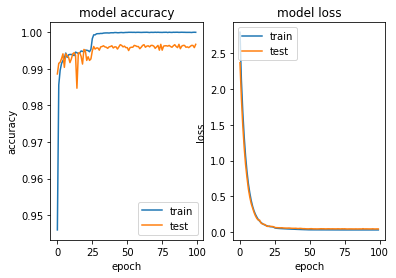

In [15]:
plothist(history)